# Fisher's Iris Dataset Notebook

## 1. Loading Tabular Data And Packages

The dataset is loaded as file `iris.csv` as downloaded from [here](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv).

In [1]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load training and test data into separate dataframes
pwd = os.getcwd()
root = Path('input', 'iris')
file = 'iris.csv'
df = pd.read_csv(root / file)

#Examine dataframe to see ensure data is loaded correctly
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2. Examine Raw Variables

The dataset contains 150 rows of data in five columns. There are two columns of float data related to the sepal of the flower (`sepal_length`, `sepal_width`), two columns of float data related to the petal of the flowerm (`petal_length`, `petal_width`), and finally a column containing the species of the flower (`species`). There appears to be no missing data.

In [3]:
#Get number of rows and columns of data in the training dataset
print(df.shape)
#Get number of non-null entries in each column, as well as the datatype of each column
df.info()
#Get information on data contained in each column including number of unique entries, mean, standard deviation, minimum and maximum values and median value
df.describe(include='all')

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


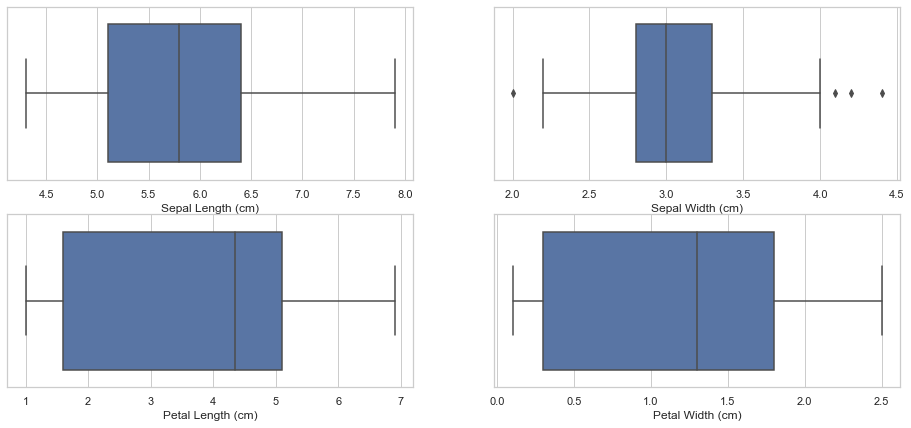

In [4]:
#Create boxplots for numerical data
plt.figure(figsize= (16,7))
sns.set_theme(style="whitegrid")
plt.subplot(2,2,1); sns.boxplot(x='sepal_length', data=df); plt.xlabel("Sepal Length (cm)");
plt.subplot(2,2,2); sns.boxplot(x='sepal_width', data=df); plt.xlabel("Sepal Width (cm)");
plt.subplot(2,2,3); sns.boxplot(x='petal_length', data=df); plt.xlabel("Petal Length (cm)");
plt.subplot(2,2,4); sns.boxplot(x='petal_width', data=df); plt.xlabel("Petal Width (cm)");

From the description and boxplots of the numerical data, there seems to be no outliers except for in the `sepal_width` feature.

The other notable observation is that there are 3 separate species in the `species` feature.

In [5]:
#Check for duplicated/repeated entries
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


There appears to be five duplicate entries, but this is understandable as out of 150 entries there a chance that multiple flowers will have the same petal and sepal dimensions and these numbers do not necessarily need to be unique.

Total missing values:  sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Text(0.5, 1.0, 'Training dataset missing values heatmap')

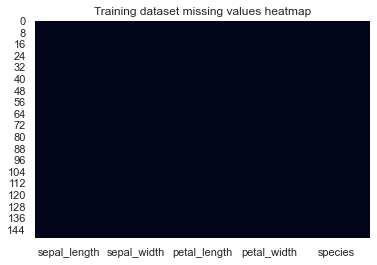

In [6]:
#Find locations of any null/missing values
print("Total missing values: ", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False).set_title("Training dataset missing values heatmap")

There are also no missing values or invalid which makes this dataset very easy to work with.

# 3. Exploratory Data Analysis (EDA):

The next step is to look at the data structure. This will be separated into three sets of plots by species.

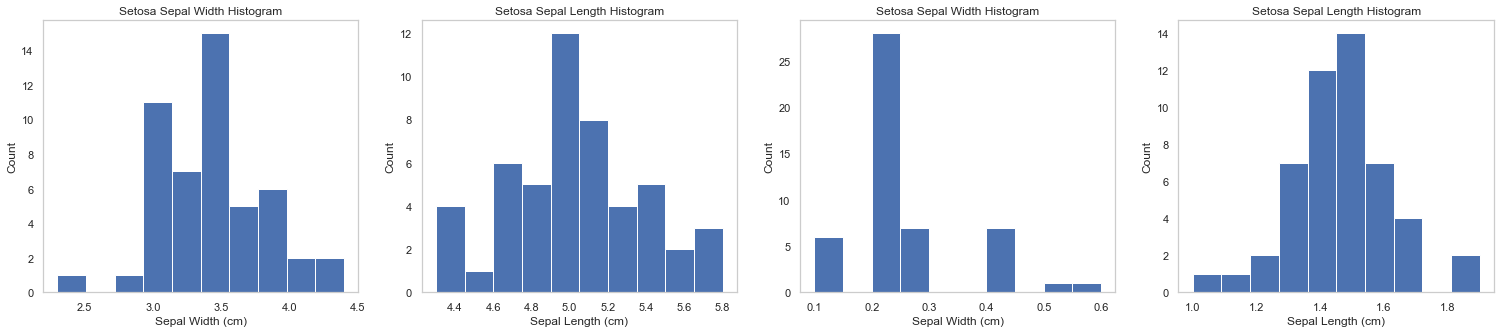

In [7]:
plt.figure(figsize=(26, 5))

plt.subplot(1, 4, 1)
df.loc[df['species'] == 'setosa', 'sepal_width'].hist(grid=False, color='b');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Setosa Sepal Width Histogram");
plt.subplot(1, 4, 2)
df.loc[df['species'] == 'setosa', 'sepal_length'].hist(grid=False, color='b');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Setosa Sepal Length Histogram");
plt.subplot(1, 4, 3)
df.loc[df['species'] == 'setosa', 'petal_width'].hist(grid=False, color='b');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Setosa Sepal Width Histogram");
plt.subplot(1, 4, 4)
df.loc[df['species'] == 'setosa', 'petal_length'].hist(grid=False, color='b');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Setosa Sepal Length Histogram");

plt.show()

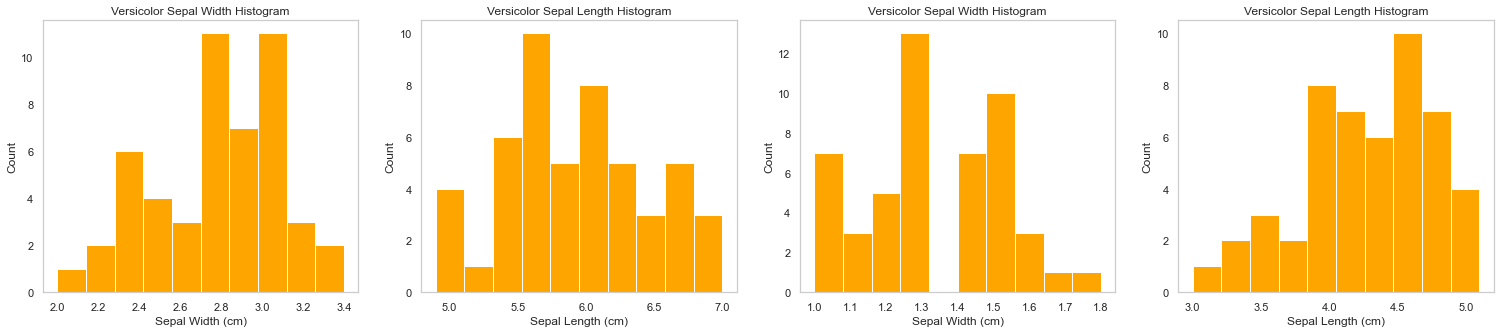

In [8]:
plt.figure(figsize=(26, 5))

plt.subplot(1, 4, 1)
df.loc[df['species'] == 'versicolor', 'sepal_width'].hist(grid=False, color='orange');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Versicolor Sepal Width Histogram");
plt.subplot(1, 4, 2)
df.loc[df['species'] == 'versicolor', 'sepal_length'].hist(grid=False, color='orange');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Versicolor Sepal Length Histogram");
plt.subplot(1, 4, 3)
df.loc[df['species'] == 'versicolor', 'petal_width'].hist(grid=False, color='orange');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Versicolor Sepal Width Histogram");
plt.subplot(1, 4, 4)
df.loc[df['species'] == 'versicolor', 'petal_length'].hist(grid=False, color='orange');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Versicolor Sepal Length Histogram");

plt.show()

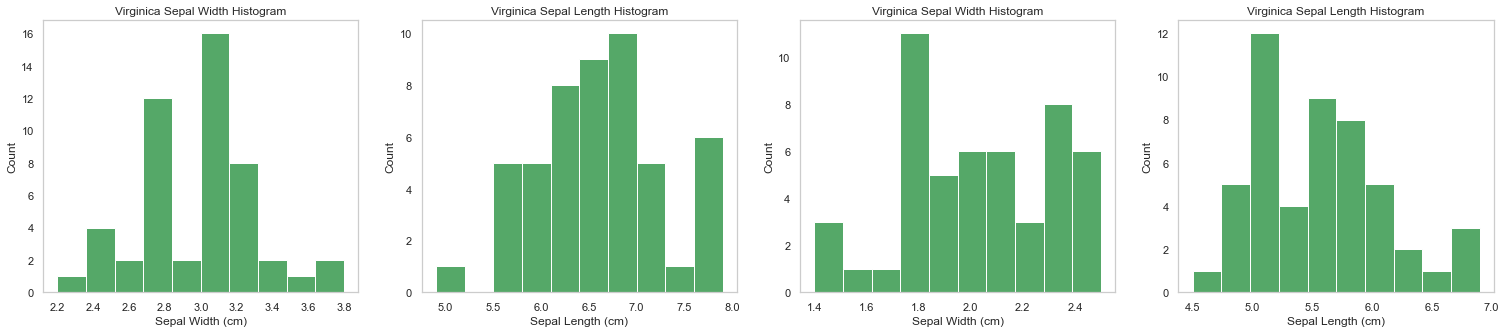

In [9]:
plt.figure(figsize=(26, 5))

plt.subplot(1, 4, 1)
df.loc[df['species'] == 'virginica', 'sepal_width'].hist(grid=False, color='g');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Virginica Sepal Width Histogram");
plt.subplot(1, 4, 2)
df.loc[df['species'] == 'virginica', 'sepal_length'].hist(grid=False, color='g');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Virginica Sepal Length Histogram");
plt.subplot(1, 4, 3)
df.loc[df['species'] == 'virginica', 'petal_width'].hist(grid=False, color='g');
plt.xlabel("Sepal Width (cm)"); plt.ylabel("Count"); plt.title("Virginica Sepal Width Histogram");
plt.subplot(1, 4, 4)
df.loc[df['species'] == 'virginica', 'petal_length'].hist(grid=False, color='g');
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Count"); plt.title("Virginica Sepal Length Histogram");

plt.show()

Using the data, a pairwise relationship plot between the variables can be created.

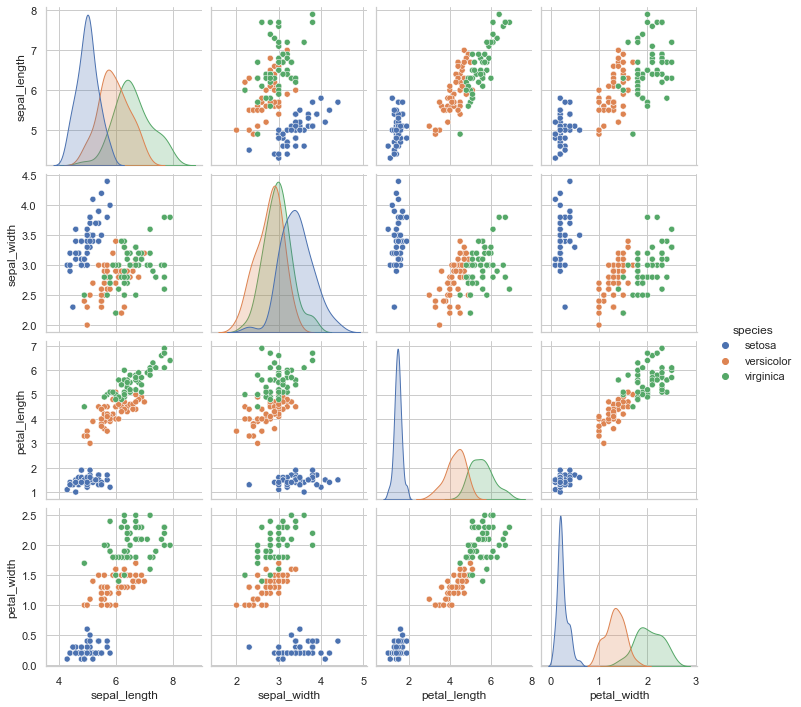

In [10]:
sns.pairplot(df, hue='species');

The main conclusions that can be drawn from this plot are:
* All data appears to be normally distributed
* Setosa species can be easily identified by the petal length and width
* Versicolor and virginica are harder to distinguish due to overlap in all measurements
* Correlation between petal width, petal length as well as between sepal width, sepal length


# 4. Model Building

The first step in this case as there is only one dataset is to split the data into two datasets: one test dataset and one training dataset. Ideally, a validation dataset would also be created to be roughly the same size as the test set to be used for hyperparameter tuning and choice of learning algorithm. However, there is not a large amount of data samples. This could be overcome with cross-validation by resampling different subsets of the full dataset to create the training, validation and testing datasets. Following the splitting of the dataset, the independent variables will be standardized.

For this many different models will be created to test the performance of various model types on this data. Accuracy scores from the internal predictions done by each model will be taken and compared against each other. There are other metrics that could be used, but accuracy will be the only one used in this case. The classification algorithms used are as follows:
1. Logistic Regression
2. Ridge Regression (L2 regularization)
3. k-Nearest Neighbors
4. Support Vector Machine (SVM) with Linear Kernel
5. Support Vector Machine (SVM) with RBF Kernel
6. Stochastic Gradient Descent
7. Naive Bayes
8. Perceptron
9. Decision Tree
10. Random Forest

In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(df.iloc[:,:-1], df.iloc[:,4:5], test_size=0.25, stratify=df.iloc[:,4:5])
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Logistic Regression Model
model_logreg = LogisticRegression(solver='lbfgs')
model_logreg.fit(X_train, y_train.values.ravel())
y_pred = model_logreg.predict(X_test)
acc_logreg = round(model_logreg.score(X_train, y_train) * 100, 2)
acc_logreg

96.43

In [13]:
#Ridge Regression Model
model_ridge = LogisticRegression()
model_ridge.fit(X_train, y_train.values.ravel())
y_pred = model_ridge.predict(X_test)
acc_ridge = round(model_ridge.score(X_train, y_train) * 100, 2)
acc_ridge

96.43

In [14]:
#k-Nearest Neighbors Model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train.values.ravel())
y_pred = model_knn.predict(X_test)
acc_knn = round(model_knn.score(X_train, y_train) * 100, 2)
acc_knn

95.54

In [15]:
#Support Vector Machine (Linear Kernel) Model
model_svml = SVC(kernel="linear")
model_svml.fit(X_train, y_train.values.ravel())
y_pred = model_svml.predict(X_test)
acc_svml = round(model_svml.score(X_train, y_train) * 100, 2)
acc_svml

98.21

In [16]:
#Support Vector Machine (Radial Basis Function Kernel) Model
model_svmr = SVC(kernel="rbf")
model_svmr.fit(X_train, y_train.values.ravel())
y_pred = model_svmr.predict(X_test)
acc_svmr = round(model_svmr.score(X_train, y_train) * 100, 2)
acc_svmr

96.43

In [17]:
#Stochastic Gradient Descent Model
model_sgd = SGDClassifier()
model_sgd.fit(X_train, y_train.values.ravel())
y_pred = model_sgd.predict(X_test)
acc_sgd = round(model_sgd.score(X_train, y_train) * 100, 2)
acc_sgd

92.86

In [18]:
#Gaussian Naive Bayes Model
model_gaussian = GaussianNB()
model_gaussian.fit(X_train, y_train.values.ravel())
y_pred = model_gaussian.predict(X_test)
acc_gaussian = round(model_gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

95.54

In [19]:
#Perceptron Model
model_perceptron = Perceptron()
model_perceptron.fit(X_train, y_train.values.ravel())
y_pred = model_perceptron.predict(X_test)
acc_perceptron = round(model_perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

86.61

In [20]:
#Decision Tree Model
model_dectree = DecisionTreeClassifier()
model_dectree.fit(X_train, y_train.values.ravel())
y_pred = model_dectree.predict(X_test)
acc_dectree = round(model_dectree.score(X_train, y_train) * 100, 2)
acc_dectree

100.0

In [21]:
#Random Forest Model
model_ranfor = RandomForestClassifier()
model_ranfor.fit(X_train, y_train.values.ravel())
y_pred = model_ranfor.predict(X_test)
acc_ranfor = round(model_ranfor.score(X_train, y_train) * 100, 2)
acc_ranfor

100.0

In [22]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Ridge Regression',
              'k-Nearest Neighbors', 'Support Vector Machines (Linear)', 'Support Vector Machines (RBF)',
              'Stochastic Gradient Decent', 'Gaussian Naive Bayes', 'Perceptron',  
              'Decision Tree', 'RandomForest'],
    'Score': [acc_logreg, acc_ridge,
              acc_knn, acc_svml, acc_svmr,
              acc_sgd, acc_gaussian, acc_perceptron,
              acc_dectree, acc_ranfor]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,100.00
9,RandomForest,100.00
3,Support Vector Machines (Linear),98.21
0,Logistic Regression,96.43
1,Ridge Regression,96.43
4,Support Vector Machines (RBF),96.43
2,k-Nearest Neighbors,95.54
6,Gaussian Naive Bayes,95.54
5,Stochastic Gradient Decent,92.86
7,Perceptron,86.61


As seen from the sorted accuracy score table, the decision tree and random forest both have an accuracy of 100%, although this is unlikely and may be due to the sample size or user error. These would be the most optimal algorithms to be used for this case.

The two examples where similar algorithms were used (SVM with two types of kernels as well as logistic and ridge regression) both output the same scores showing that the changes in algorithm had no affect on the accuracy of the model in this case.